# 1. 데이터 불러와서 resize 하기

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os

fx = 28
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(fx,fx)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "C:\\Users\\Soonju\\Desktop\\Aiffel\\rock_scissor_paper\\ex5\\scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")
image_dir_path = "C:\\Users\\Soonju\\Desktop\\Aiffel\\rock_scissor_paper\\ex5\\rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")
image_dir_path = "C:\\Users\\Soonju\\Desktop\\Aiffel\\rock_scissor_paper\\ex5\\paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")


400  images to be resized.


C:\Users\Soonju\AppData\Local\Temp\ipykernel_8924\2720585568.py:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


400  images resized.
가위 이미지 resize 완료!
400  images to be resized.
400  images resized.
바위 이미지 resize 완료!
400  images to be resized.
400  images resized.
보 이미지 resize 완료!


# 2. load_data 함수 만들면서 reshape 하기


In [2]:

import numpy as np

def load_data(img_path, number_of_data=1200):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=fx
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

# 3. train, test 데이터 나누고 정규화

In [3]:

from sklearn.model_selection import train_test_split


image_dir_path = "C:\\Users\\Soonju\\Desktop\\Aiffel\\rock_scissor_paper\\ex5"
(x, y)=load_data(image_dir_path)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,shuffle=True,random_state=1004)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
x_test_norm = x_test/255.0

학습데이터(x_train)의 이미지 개수는 1200 입니다.


In [4]:
print("x_train shape: {}".format(x_train.shape))
print("x_test. shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("x_train_norm shape: {}".format(x_train_norm.shape))
print("x_test_norm shape: {}".format(x_train_norm.shape))
print("x_train_norm[0] shape: {}".format(x_train_norm[0].shape)) 
print("x_test_norm[0] shape: {}".format(x_train_norm[0].shape)) 

x_train shape: (720, 28, 28, 3)
x_test. shape: (480, 28, 28, 3)
y_train shape: (720,)
y_test shape: (480,)
x_train_norm shape: (720, 28, 28, 3)
x_test_norm shape: (720, 28, 28, 3)
x_train_norm[0] shape: (28, 28, 3)
x_test_norm[0] shape: (28, 28, 3)


라벨:  1


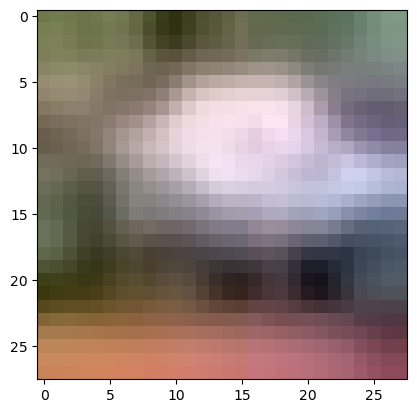

In [5]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 4. 모델링 및 학습

In [6]:

import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(fx,fx,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
          
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history=model.fit(x_train_norm, y_train, validation_split=0.2, epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

# 5. test 넣어 검증하기

In [7]:

test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

# dense 512, epoch 50
# 10/10 - 0s - loss: 1.1832 - accuracy: 0.3333 - 32ms/epoch - 3ms/step
# test_loss: 1.1831624507904053
# test_accuracy: 0.3333333432674408

# jw-kh, conv64add, lr0.01, epoch50 (acc 그래프는 좋았으나 )
# 10/10 - 0s - loss: 7.9823 - accuracy: 0.2467 - 44ms/epoch - 4ms/step
# test_loss: 7.982333183288574
# test_accuracy: 0.24666666984558105

# kh-jw, conv64add, lr0.01, epoch50 
# 10/10 - 0s - loss: 39.8681 - accuracy: 0.3333 - 56ms/epoch - 6ms/step
# test_loss: 39.868125915527344
# test_accuracy: 0.3333333432674408

# kh-jw, dense512, lr0.01, epoch50 
# 10/10 - 0s - loss: 23.6164 - accuracy: 0.3333 - 59ms/epoch - 6ms/step
# test_loss: 23.616443634033203
# test_accuracy: 0.3333333432674408

15/15 - 0s - loss: 0.3960 - accuracy: 0.8687 - 42ms/epoch - 3ms/step
test_loss: 0.3959996998310089
test_accuracy: 0.8687499761581421


# 6. 결과 시각화

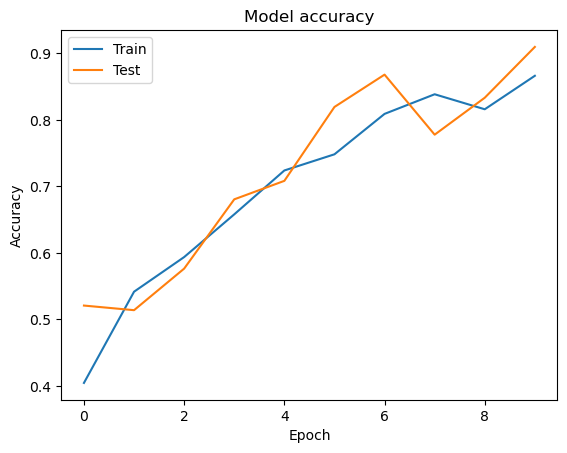

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

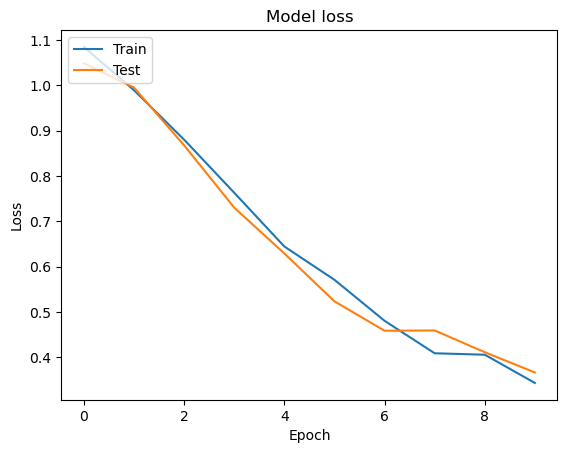

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 회고

처음에 accuracy가 0.33에서 올라가지 않아 시간이 많이 소요되었다.  
새로운 데이터셋을 촬영하여 시도도 하였지만 accuracy는 자꾸 떨어졌다.  
그러다가 조원들의 데이터를 모두 모아 train, test로 분리하는 방법을 써봤는데 결과가 좋았다.  
하지만 이것이 정말 범용적으로 쓸 수 있는 분류기일까에 대한 의심은 해소되지 않았다.  
이미지를 증강하는 방법이 있던데 나중에 시도해봐야겠다.  

최종결과  
test_loss: 0.3959996998310089  
test_accuracy: 0.8687499761581421